## AOC 2024/20

### Part 1

--- Day 20: Race Condition ---
The Historians are quite pixelated again. This time, a massive, black building looms over you - you're right outside the CPU!

While The Historians get to work, a nearby program sees that you're idle and challenges you to a race. Apparently, you've arrived just in time for the frequently-held race condition festival!

The race takes place on a particularly long and twisting code path; programs compete to see who can finish in the fewest picoseconds. The winner even gets their very own mutex!

They hand you a map of the racetrack (your puzzle input). For example:

```
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
```

The map consists of track (`.`) - including the start (`S`) and end (`E`) positions (both of which also count as track) - and walls (`#`).

When a program runs through the racetrack, it starts at the start position. Then, it is allowed to move up, down, left, or right; each such move takes 1 picosecond. The goal is to reach the end position as quickly as possible. In this example racetrack, the fastest time is 84 picoseconds.

Because there is only a single path from the start to the end and the programs all go the same speed, the races used to be pretty boring. To make things more interesting, they introduced a new rule to the races: programs are allowed to cheat.

The rules for cheating are very strict. Exactly once during a race, a program may disable collision for up to 2 picoseconds. This allows the program to pass through walls as if they were regular track. At the end of the cheat, the program must be back on normal track again; otherwise, it will receive a segmentation fault and get disqualified.

So, a program could complete the course in 72 picoseconds (saving 12 picoseconds) by cheating for the two moves marked 1 and 2:

```
###############
#...#...12....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
```

Or, a program could complete the course in 64 picoseconds (saving 20 picoseconds) by cheating for the two moves marked 1 and 2:

```
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...12..#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
```

This cheat saves 38 picoseconds:

```
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.####1##.###
#...###.2.#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
```

This cheat saves 64 picoseconds and takes the program directly to the end:

```
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..21...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
```

Each cheat has a distinct start position (the position where the cheat is activated, just before the first move that is allowed to go through walls) and end position; cheats are uniquely identified by their start position and end position.

In this example, the total number of cheats (grouped by the amount of time they save) are as follows:

- There are 14 cheats that save 2 picoseconds.
- There are 14 cheats that save 4 picoseconds.
- There are 2 cheats that save 6 picoseconds.
- There are 4 cheats that save 8 picoseconds.
- There are 2 cheats that save 10 picoseconds.
- There are 3 cheats that save 12 picoseconds.
- There is one cheat that saves 20 picoseconds.
- There is one cheat that saves 36 picoseconds.
- There is one cheat that saves 38 picoseconds.
- There is one cheat that saves 40 picoseconds.
- There is one cheat that saves 64 picoseconds.

You aren't sure what the conditions of the racetrack will be like, so to give yourself as many options as possible, you'll need a list of the best cheats. How many cheats would save you at least 100 picoseconds?

**AI Prompt**

I'm a skilled python developer, please help go consider various approaches for solving this problem and their pros/cons. I prefer simpler and understandable solutions, easily readable also for other developers. It's ok to generate code with testcases without explanation. I'll ask if I do not understand it.

**AI Response**

For this pathfinding problem with a "cheating" mechanic, let's consider a few approaches:

1. Modified BFS/Dijkstra:
- Pros: Relatively simple to implement, guaranteed to find shortest paths
- Cons: Might be slower than necessary since it explores in all directions

2. A* with state tracking:
- Pros: More efficient than BFS by using heuristics to guide search
- Cons: Need to carefully design the state space to handle the cheating mechanic

3. Two-phase approach:
- First find shortest regular path
- Then try all possible 2-step cheats from positions along/near that path
- Pros: Could be much faster if most good cheats are near the optimal path
- Cons: Might miss some optimal solutions if they're far from the regular path

Would you like me to implement one of these approaches? Which one interests you most? Or would you prefer to see a simple test case implementation first to better understand the problem?

**AI Prompt**

the two phase approach looks promising to me. I do not understand, why should it miss some optimal solutions?

**AI Response**

Let me explain why the two-phase approach might miss solutions with an example:

Imagine a maze where the regular shortest path goes around a long detour, but there's actually a much shorter path that requires cheating through a wall that's quite far from the regular path. If we only look for cheats near the regular path, we might miss this better solution.

Here's a simple ASCII visualization:
```
#########E####
#.....#......#
#.....#......#
#.....#......#
S.....#......#
```

The regular path (without cheating) would go all the way around the wall. But the optimal solution with cheating might be to go straight through the wall, which isn't "near" the regular path.

Would you still like to try the two-phase approach? We could modify it to also consider cheats within some wider radius of the regular path, or explore from multiple different regular paths to increase coverage.

**AI Prompt**

Are you sure? In problem statement they say there is only single path from the start to the end.

**AI Response**

Ah, you caught my mistake! You're absolutely right - I apologize for missing this crucial detail from the problem statement:

> "Because there is only a single path from the start to the end and the programs all go the same speed, the races used to be pretty boring."

This actually makes the problem much simpler! Since there's only one possible path, we don't need to worry about finding different routes. The two-phase approach would work perfectly here:

1. First find the single valid path
2. For each position on this path, try all possible 2-step cheats to find shortcuts

Would you like me to proceed with implementing this approach? This constraint removes my earlier concern about missing solutions, since all valid cheats must start from somewhere on this single path.

In [ ]:
from typing import TypeAlias

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

Node: TypeAlias = tuple[int, int]
Path: TypeAlias = list[Node]


def draw_grid_with_paths(
    G: nx.Graph,
    paths: list[Path],
    *,
    fig_size: int = 2,
    node_size: int = 2,
    palette: str = "tab10",
):
    """
    Visualize paths in a grid
    """

    colors = mpl.colormaps[palette].colors
    pos = {(x, y): (x, y) for x, y in G.nodes()}
    plt.figure(figsize=(fig_size, fig_size))
    nx.draw(G, pos, node_size=1, node_color=[colors[0]])

    path_colors = colors[2:]
    for i, path in enumerate(paths):
        c1 = path_colors[(i * 2) % len(path_colors)]
        c2 = path_colors[(i * 2 + 1) % len(path_colors)]

        # Draw path edges
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=[c1], width=1)
        # Draw path nodes
        nx.draw_networkx_nodes(
            G, pos, nodelist=path, node_color=[c1], node_size=node_size
        )
        # Highlight start end
        nx.draw_networkx_nodes(
            G,
            pos,
            nodelist=[path[0], path[-1]],
            node_color=[c2],
            node_size=node_size * 2,
        )

    plt.grid(True)
    plt.show()


def draw_grid_with_path(
    G: nx.Graph,
    path: Path | None = None,
    *,
    fig_size: int = 2,
    node_size: int = 2,
):
    """
    Visualize path in a grid
    """
    return draw_grid_with_paths(
        G, [path] if path else [], fig_size=fig_size, node_size=node_size
    )


def draw_grid(G: nx.Graph, *, fig_size: int = 2):
    """
    Draw the grid with node positions matching coordinates
    """
    draw_grid_with_path(G, fig_size=fig_size)


def find_shortest_path(G: nx.Graph, start: Node, end: Node) -> Path | None:
    """
    Find shortest path between start and end points
    """

    try:
        path = nx.shortest_path(G, start, end)
        # print(f"Shortest path: {path}")
        return path
    except nx.NetworkXNoPath:
        return None

**AI Prompt**

yes, please proceed with the implementation. Please use the graph library called networkx, I want learn and practise and more with that.

I have these useful functions in my toolbox from previous problem solutions. I already understand well code in them. You might use them when appropriate.

**AI Response**

Great! Those helper functions will be useful. Let's break down the implementation into steps:

1. First, let's create a function to parse the input into a NetworkX graph. Would you like me to show you how to do that first, or would you prefer to try implementing it yourself using NetworkX? 

The key points for the parser would be:
- Create a grid graph where nodes are (x,y) coordinates
- Add edges only between adjacent '.' cells (including 'S' and 'E')
- Keep track of start ('S') and end ('E') positions

Let me know which part you'd like to tackle first!

**AI Prompt**

sounds ok, please proceed, please mind correct coordinates mapping. `0,0` is in bottom left.

**AI Response**

I'll help you create a parser that maintains `0,0` at bottom left. Here's a function to create the graph from the input:

```python
def parse_input(text: str) -> tuple[nx.Graph, Node, Node]:
    """
    Parse input text into a graph, maintaining 0,0 at bottom left.
    Returns (graph, start_pos, end_pos)
    """
    G = nx.Graph()
    lines = text.strip().split('\n')
    height = len(lines)
    
    start_pos = end_pos = None
    
    # Convert coordinates to have 0,0 at bottom left
    for y, line in enumerate(lines):
        actual_y = height - 1 - y  # Transform y coordinate
        for x, char in enumerate(line):
            if char != '#':  # Add node if it's not a wall
                G.add_node((x, actual_y))
                if char == 'S':
                    start_pos = (x, actual_y)
                elif char == 'E':
                    end_pos = (x, actual_y)
                
                # Add edges to neighbors (if they exist)
                if x > 0 and lines[y][x-1] != '#':
                    G.add_edge((x, actual_y), (x-1, actual_y))
                if actual_y < height-1 and lines[y-1][x] != '#':
                    G.add_edge((x, actual_y), (x, actual_y+1))
    
    return G, start_pos, end_pos
```

Would you like to test this with the example input? I can help you write a test case, or we can move on to implementing the cheat-finding logic.

In [ ]:
def parse_input(text: str) -> tuple[nx.Graph, Node, Node]:
    """
    Parse input text into a graph, maintaining 0,0 at bottom left.
    Returns (graph, start_pos, end_pos)
    """
    G = nx.Graph()
    lines = text.strip().split('\n')
    height = len(lines)
    
    start_pos = end_pos = None
    
    # Convert coordinates to have 0,0 at bottom left
    for y, line in enumerate(lines):
        actual_y = height - 1 - y  # Transform y coordinate
        for x, char in enumerate(line):
            if char != '#':  # Add node if it's not a wall
                G.add_node((x, actual_y))
                if char == 'S':
                    start_pos = (x, actual_y)
                elif char == 'E':
                    end_pos = (x, actual_y)
                
                # Add edges to neighbors (if they exist)
                if x > 0 and lines[y][x-1] != '#':
                    G.add_edge((x, actual_y), (x-1, actual_y))
                if actual_y < height-1 and lines[y-1][x] != '#':
                    G.add_edge((x, actual_y), (x, actual_y+1))
    
    return G, start_pos, end_pos

**AI Prompt**

please firt visualize the parsed grid

**AI Response**

Here's a test using the example from the problem statement and our visualization functions:

```python
test_input = """
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
""".strip()

G, start, end = parse_input(test_input)
print(f"Start: {start}, End: {end}")
draw_grid(G, fig_size=10)  # Making it larger to see clearly
```

This will show us the graph structure. The nodes should be all traversable positions. Would you like to run this and see if the visualization looks correct?

Start: (1, 11), End: (5, 7)


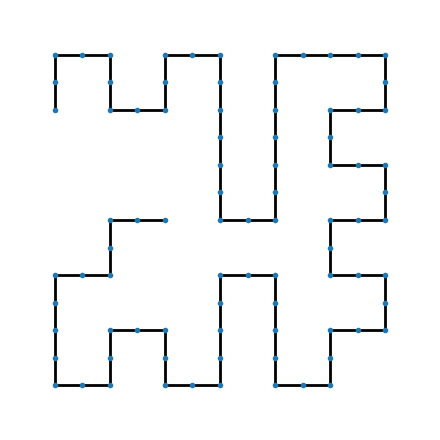

In [ ]:
test_input = """
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
""".strip()

def test_load_input():
    G, start, end = parse_input(test_input)
    print(f"Start: {start}, End: {end}")
    draw_grid(G, fig_size=2)  # Making it larger to see clearly
    
test_load_input()

**AI Prompt**

load full data from aoc

**AI Response**

I'll help you load the actual puzzle input using the advent-of-code-data library:

```python
from aocd import get_data

puzzle_input = get_data(year=2024, day=20)
G, start, end = parse_input(puzzle_input)
print(f"Start: {start}, End: {end}")
draw_grid(G, fig_size=20)  # Making it larger since real input might be bigger
```

Let's run this and see what the actual maze looks like. Then we can proceed with finding the base path and implementing the cheating logic.

Start: (49, 51), End: (31, 41)


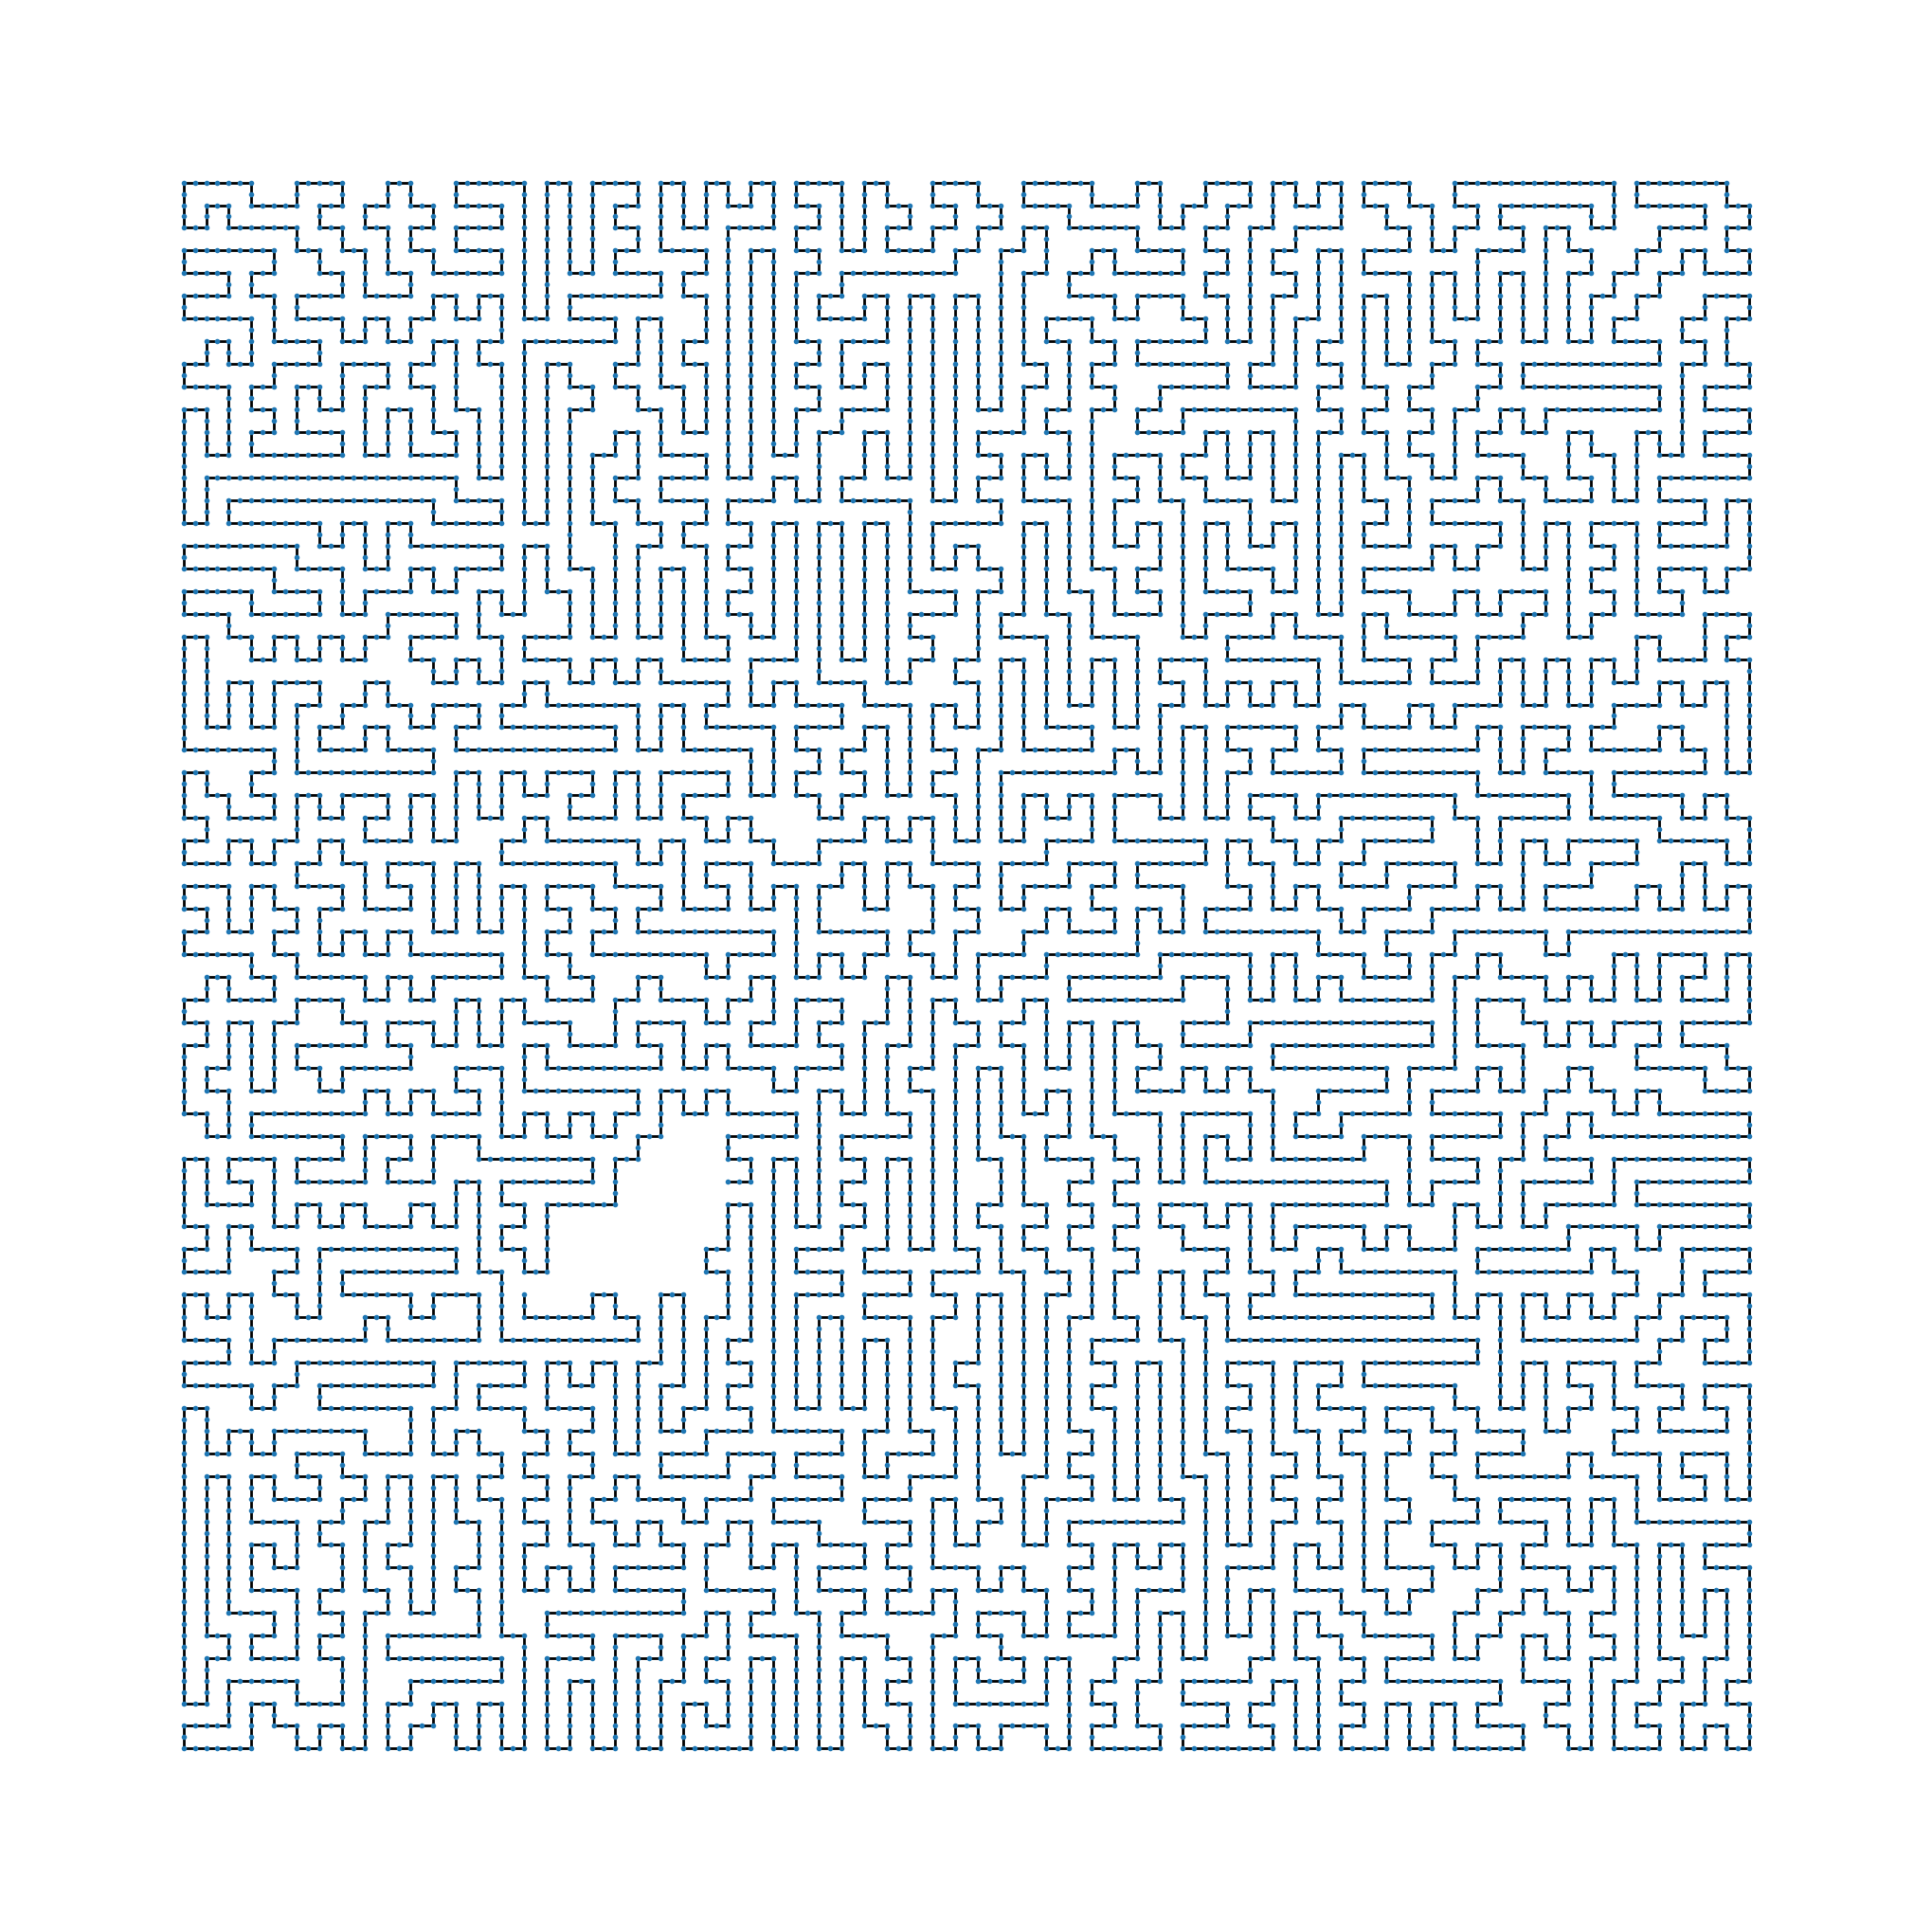

In [ ]:
from aocd import get_data
full_input = get_data(year=2024, day=20)

def test_full_input():
    G, start, end = parse_input(full_input)
    print(f"Start: {start}, End: {end}")
    draw_grid(G, fig_size=10)  # Making it larger since real input might be bigger

test_full_input()

**AI Prompt**

find shortest path in grid and print its length

**AI Response**

I'll use the `find_shortest_path` function from your toolbox and add path length calculation:

```python
# Find the path and visualize it
G, start, end = parse_input(full_input)
path = find_shortest_path(G, start, end)
path_length = len(path) - 1  # -1 because we count steps between nodes

print(f"Path length: {path_length} steps")
draw_grid_with_path(G, path, fig_size=10)
```

This will show us the base path (without any cheating) and its length. After we see this result, we can move on to implementing the cheating logic. Would you like to run this?

Path length: 84 steps


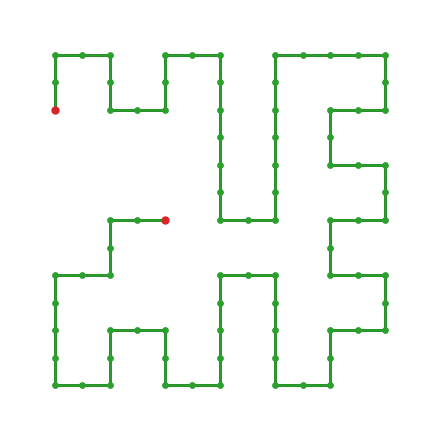

In [ ]:
def test_sample_draw_path():
    G, start, end = parse_input(test_input)
    path = find_shortest_path(G, start, end)
    path_length = len(path) - 1  # -1 because we count steps between nodes

    print(f"Path length: {path_length} steps")
    draw_grid_with_path(G, path, fig_size=2)

test_sample_draw_path()

Path length: 9456 steps


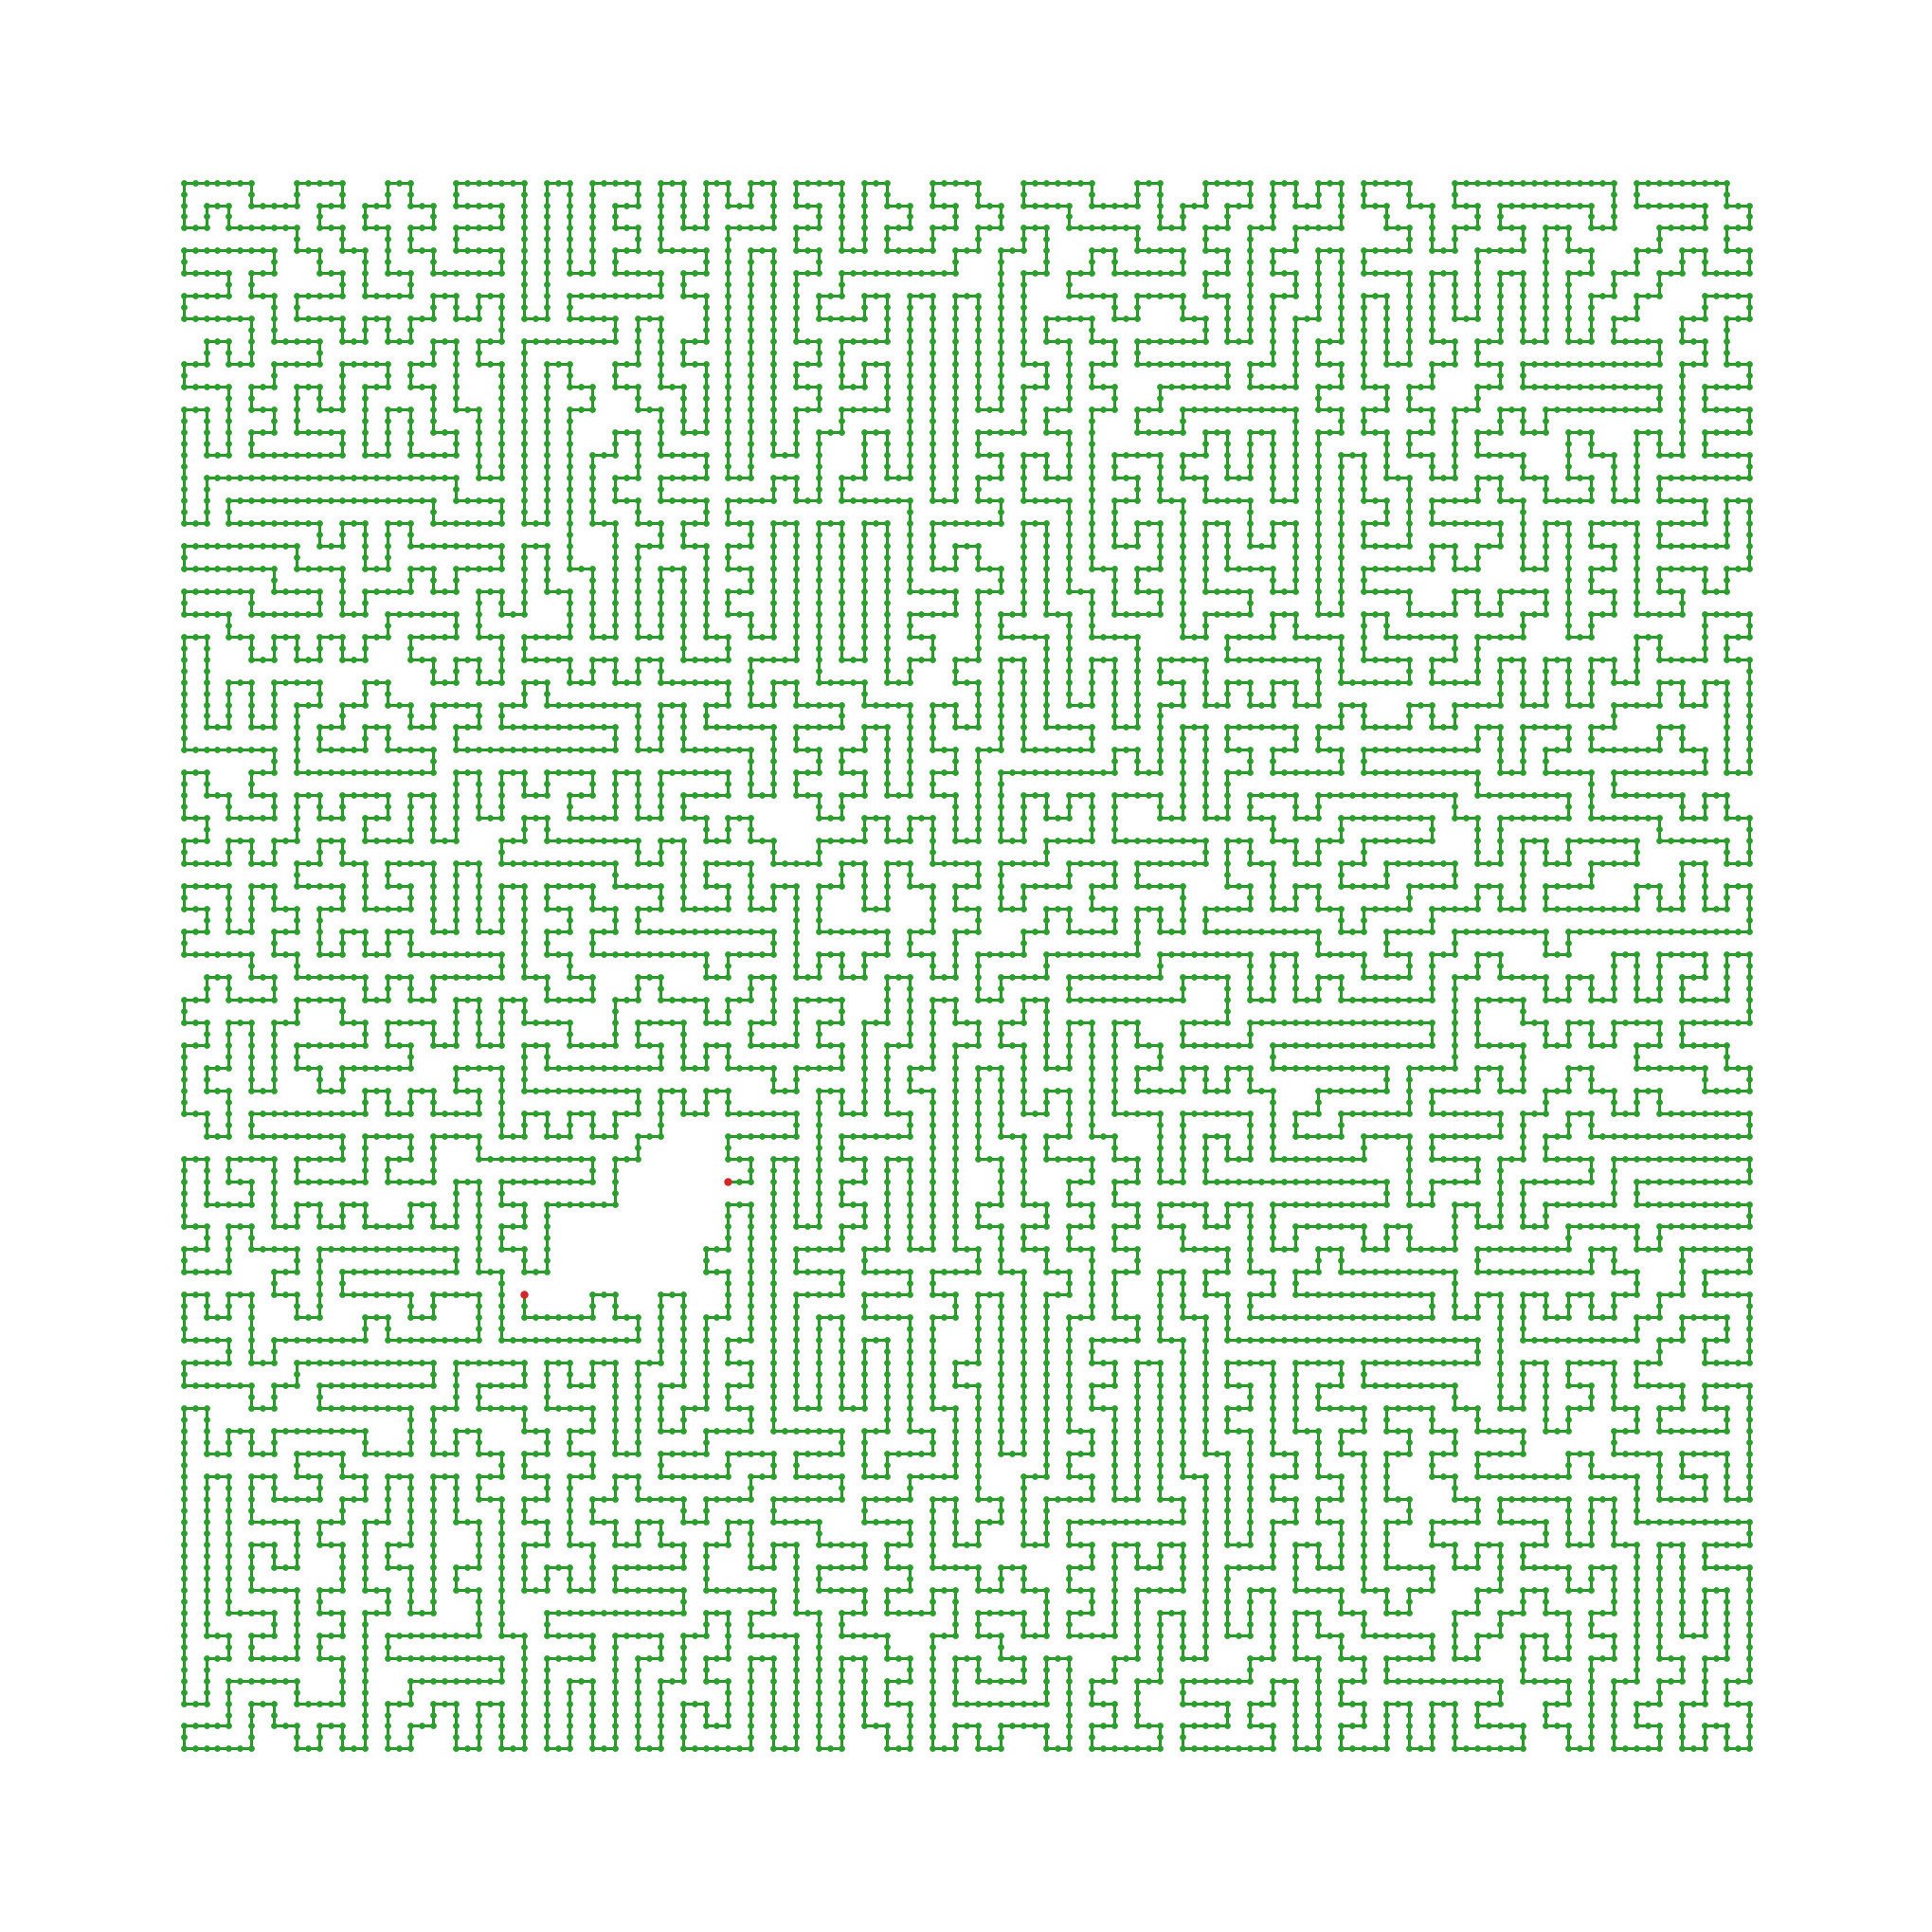

In [ ]:
def test_full_draw_path():
    G, start, end = parse_input(full_input)
    path = find_shortest_path(G, start, end)
    path_length = len(path) - 1  # -1 because we count steps between nodes

    print(f"Path length: {path_length} steps")
    draw_grid_with_path(G, path, fig_size=10)

test_full_draw_path()

**AI Prompt**

ok, we have an estimate of problem complexity, proceed with implementation. outline a plat first

**AI Response**

Let's outline the approach for finding the cheats that save at least 100 picoseconds:

1. We already have the base path length (9456 steps)
2. For each position on the path we need to:
   - Try all possible 2-step cheats from that position
   - For each cheat end position:
     - Calculate new path length (steps to cheat start + 2 steps cheat + steps from cheat end to goal)
     - Calculate time saved (base_path_length - new_path_length)
   - Keep track of cheats that save ≥ 100 steps

Key functions we'll need:
```python
def find_possible_cheat_ends(G: nx.Graph, pos: Node) -> list[Node]:
    """Find all positions reachable in exactly 2 steps through walls"""

def calculate_cheat_path_length(G: nx.Graph, base_path: Path, cheat_start: Node, cheat_end: Node) -> int:
    """Calculate total path length when using a specific cheat"""
```

Would you like me to implement either of these functions first, or would you prefer to adjust the plan?

**AI Prompt**

sounds solid, proceed

**AI Response**

Let's implement `find_possible_cheat_ends` first. We need to find all positions that are 2 steps away in any direction, excluding positions that are reachable through normal paths:

```python
def find_possible_cheat_ends(G: nx.Graph, pos: Node) -> list[Node]:
    """Find all positions reachable in exactly 2 steps through walls"""
    x, y = pos
    # All possible positions 2 steps away
    possible_ends = [
        (x+2, y), (x-2, y),  # horizontal
        (x, y+2), (x, y-2),  # vertical
        (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)  # diagonal
    ]
    
    # Filter for valid positions (must be nodes in graph)
    # and must NOT be reachable in 2 steps through normal paths
    valid_ends = []
    for end in possible_ends:
        if end in G.nodes():
            paths = list(nx.all_simple_paths(G, pos, end, cutoff=2))
            if not paths:  # If no normal path exists
                valid_ends.append(end)
                
    return valid_ends

# Let's test it with a position from our path
test_pos = path[10]  # Take a position from somewhere along the path
cheats = find_possible_cheat_ends(G, test_pos)
print(f"From position {test_pos}, possible cheat ends: {cheats}")
```

Would you like to run this and see if it finds valid cheat positions? Then we can move on to implementing the path length calculation function.

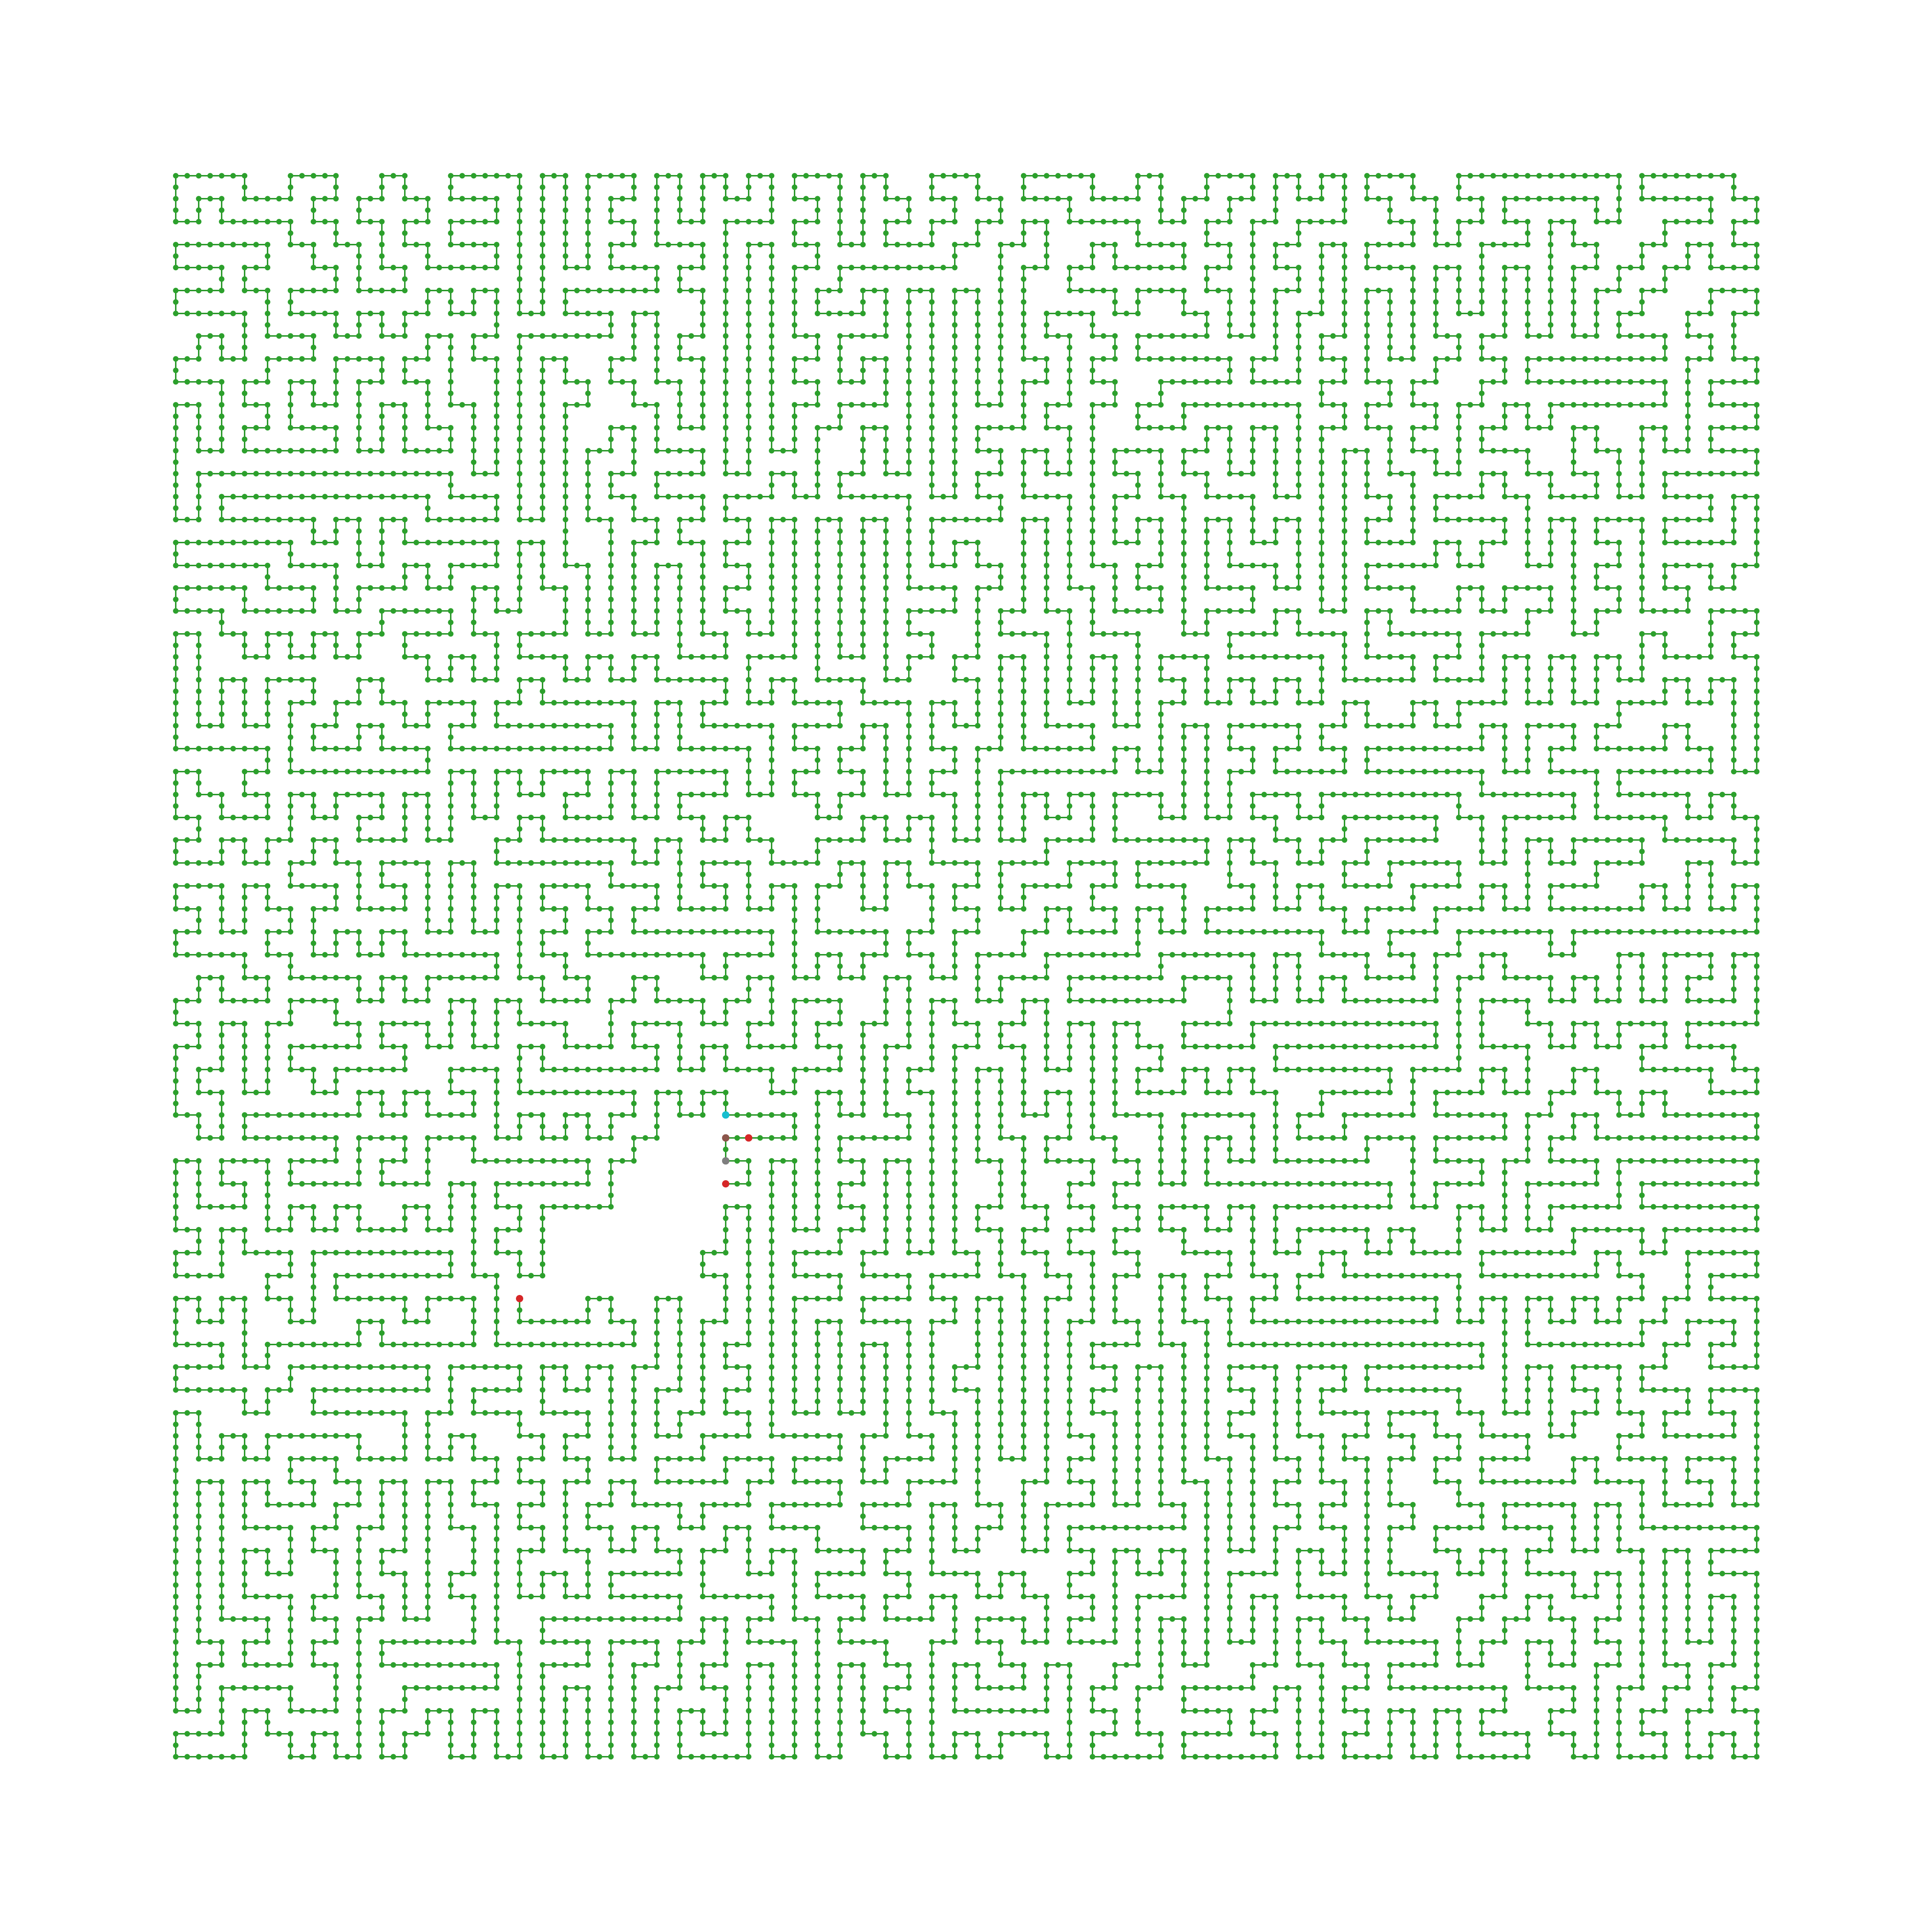

In [ ]:
# def find_possible_cheat_ends(G: nx.Graph, pos: Node) -> list[Node]:
#     """Find all positions reachable in exactly 2 steps through walls"""
#     x, y = pos
#     # All possible positions 2 steps away
#     possible_ends = [
#         (x+2, y), (x-2, y),  # horizontal
#         (x, y+2), (x, y-2),  # vertical
#         (x+1, y+1), (x+1, y-1), (x-1, y+1), (x-1, y-1)  # diagonal
#     ]
#
#     # Filter for valid positions (must be nodes in graph)
#     # and must NOT be reachable in 2 steps through normal paths
#     valid_ends = []
#     for end in possible_ends:
#         if end in G.nodes():
#             valid_ends.append(end)
# 
#     return valid_ends

def find_possible_cheat_ends(G: nx.Graph, pos: Node, mh_min: int, mh_max: int) -> list[Node]:
    """
    Find all positions reachable with Manhattan distance between mh_min and mh_max steps
    """
    x, y = pos
    valid_ends = []
    
    # Check all positions within max distance
    for dx in range(-mh_max, mh_max + 1):
        for dy in range(-mh_max, mh_max + 1):
            end = (x + dx, y + dy)
            if end in G.nodes():
                manhattan_dist = abs(dx) + abs(dy)
                if mh_min <= manhattan_dist <= mh_max:
                    valid_ends.append(end)
    
    return valid_ends

def draw_cheat_ends(G: nx.Graph, path: Path, pos: Node, mh_min: int, mh_max: int):   
    draw_grid_with_paths(G, [
        path, 
        [pos,pos], 
        *[[e,e] for e in find_possible_cheat_ends(G, pos, mh_min, mh_max)]
    ], fig_size=20, node_size=10)

def test_cheat_ends(local_input: str, path_idx:int ):
    G, start, end = parse_input(local_input)
    path = find_shortest_path(G, start, end)
    draw_cheat_ends(G, path, path[path_idx], 2, 2)
    
test_cheat_ends(full_input, 8)

**AI Prompt**

now for each cheat end calculate distance to shortcut start, length of shortcut, distance from shortcut end and time saved . Make use of fact, that distacte to start/end is positin in path list

**AI Response**

Yes, we can use path indices to calculate distances efficiently. Here's the calculation function:

```python
def calculate_cheat_savings(path: Path, cheat_start_idx: int, cheat_end: Node) -> tuple[int, int, int, int]:
    """
    Returns (distance_to_start, shortcut_length, distance_to_end, time_saved)
    Using path indices for efficient distance calculation
    """
    base_length = len(path) - 1
    
    # Find where in the path our cheat end would connect
    try:
        cheat_end_idx = path.index(cheat_end)
    except ValueError:
        return None  # This end point isn't on our path
    
    # Calculate components
    dist_to_start = cheat_start_idx  # Steps from start to cheat entry
    shortcut_length = 2  # Always 2 steps for the cheat
    dist_to_end = base_length - cheat_end_idx  # Steps from cheat exit to end
    
    # Calculate total new path length and time saved
    new_length = dist_to_start + shortcut_length + dist_to_end
    time_saved = base_length - new_length
    
    return (dist_to_start, shortcut_length, dist_to_end, time_saved)

# Let's test it with a single position
test_idx = 10
test_pos = path[test_idx]
cheat_ends = find_possible_cheat_ends(G, test_pos)

print(f"Testing cheats from position {test_pos} (index {test_idx}):")
for end in cheat_ends:
    result = calculate_cheat_savings(path, test_idx, end)
    if result:
        dist_to_start, shortcut, dist_to_end, saved = result
        print(f"Cheat to {end}: {dist_to_start=}, {shortcut=}, {dist_to_end=}, {saved=}")
```

This should show us the time savings for each possible cheat from a given position. Would you like to run this and see the results? Then we can wrap it all together to find all cheats that save ≥100 steps.

In [ ]:
def calculate_cheat_savings(path: Path, cheat_start_idx: int, cheat_end: Node) -> tuple[int, int, int, int]:
    """
    Returns (distance_to_start, shortcut_length, distance_to_end, time_saved)
    Using path indices for efficient distance calculation
    """
    base_length = len(path) - 1
    cheat_start = path[cheat_start_idx]
    
    # Calculate actual Manhattan distance for the cheat
    dx = abs(cheat_end[0] - cheat_start[0])
    dy = abs(cheat_end[1] - cheat_start[1])
    shortcut_length = dx + dy
    
    # Find where in the path our cheat end would connect
    try:
        cheat_end_idx = path.index(cheat_end)
    except ValueError:
        return None  # This end point isn't on our path
    
    # Calculate components
    dist_to_start = cheat_start_idx
    dist_to_end = base_length - cheat_end_idx
    
    # Calculate total new path length and time saved
    new_length = dist_to_start + shortcut_length + dist_to_end
    time_saved = base_length - new_length
    
    return (dist_to_start, shortcut_length, dist_to_end, time_saved)

# Let's test it with a single position
def test_savings(local_input: str, test_idx:int):
    G, start, end = parse_input(local_input)
    path = find_shortest_path(G, start, end)    
    test_pos = path[test_idx]

    cheat_ends = find_possible_cheat_ends(G, test_pos, mh_min=2, mh_max=2)

    print(f"Testing cheats from position {test_pos} (index {test_idx}):")
    for end in cheat_ends:
        result = calculate_cheat_savings(path, test_idx, end)
        if result:
            dist_to_start, shortcut, dist_to_end, saved = result
            print(f"Cheat to {end}: {dist_to_start=}, {shortcut=}, {dist_to_end=}, {saved=}")

test_savings(full_input, 8)

Testing cheats from position (49, 55) (index 8):
Cheat to (49, 53): dist_to_start=8, shortcut=2, dist_to_end=9450, saved=-4
Cheat to (49, 57): dist_to_start=8, shortcut=2, dist_to_end=9434, saved=12
Cheat to (51, 55): dist_to_start=8, shortcut=2, dist_to_end=9446, saved=0


**AI Prompt**

for all steps along the path in G using `calculate_cheat_savings` return list where each items is a *list* of tuples `(cheat start, cheat end, time saving)` it time saving is positive

**AI Response**

Here's a function to collect all positive-saving cheats for each position along the path:

```python
def find_all_cheats(G: nx.Graph, path: Path) -> list[list[tuple[Node, Node, int]]]:
    """
    Returns list where each item is a list of (start, end, saving) tuples for each position
    Only includes positive savings
    """
    all_cheats = []
    
    for idx, pos in enumerate(path):
        position_cheats = []
        cheat_ends = find_possible_cheat_ends(G, pos)
        
        for end in cheat_ends:
            result = calculate_cheat_savings(path, idx, end)
            if result and result[3] > 0:  # if we have results and saved time is positive
                position_cheats.append((pos, end, result[3]))
        
        all_cheats.append(position_cheats)
    
    return all_cheats

# Let's test it
cheats = find_all_cheats(G, path)
print(f"Found cheats at {sum(1 for c in cheats if c)} positions")
# Print first few positions that have cheats
for i, pos_cheats in enumerate(cheats):
    if pos_cheats:
        print(f"\nPosition {i} ({path[i]}):")
        for start, end, saving in pos_cheats:
            print(f"  Can cheat to {end}, saving {saving} steps")
        if i > 5:  # just show first few
            break
```

This will give us a complete list of all possible cheats and their savings. Would you like to run this and see what we find?

In [ ]:
def find_all_cheats(G: nx.Graph, path: Path, mh_min:int, mh_max:int) -> list[list[tuple[Node, Node, int]]]:
    """
    Returns list where each item is a list of (start, end, saving) tuples for each position
    Only includes positive savings
    """
    all_cheats = []
    
    for idx, pos in enumerate(path):
        position_cheats = []
        cheat_ends = find_possible_cheat_ends(G, pos, mh_min, mh_max)
        
        for end in cheat_ends:
            result = calculate_cheat_savings(path, idx, end)
            if result and result[3] > 0:  # if we have results and saved time is positive
                position_cheats.append((pos, end, result[3]))
        
        all_cheats.append(position_cheats)
    
    return all_cheats

def test_all_cheats(local_input: str, test_idx:int):
    G, start, end = parse_input(local_input)
    path = find_shortest_path(G, start, end)

    # Let's find all beneficial cheats
    cheats = find_all_cheats(G, path, 2, 2)
    print("Beneficial cheats:")
    print(f"  Times saved: {cheats[test_idx]}")

test_all_cheats(full_input, 8)

Beneficial cheats:
  Times saved: [((49, 55), (49, 57), 12)]


**AI Prompt**

now using `find_all_cheats` test in on sample data, print results in the form similar to puzzle input

**AI Response**

I'll create a function to format and display the results like in the puzzle example:

```python
def analyze_cheats(input_text: str):
    G, start, end = parse_input(input_text)
    path = find_shortest_path(G, start, end)
    cheats = find_all_cheats(G, path)
    
    # Collect all savings and count them
    savings_count = {}
    for pos_cheats in cheats:
        for _, _, saving in pos_cheats:
            savings_count[saving] = savings_count.get(saving, 0) + 1
    
    # Print in format matching the puzzle example
    print("Found cheats that save:")
    for saving in sorted(savings_count.keys()):
        count = savings_count[saving]
        if count == 1:
            print(f"There is one cheat that saves {saving} picoseconds.")
        else:
            print(f"There are {count} cheats that save {saving} picoseconds.")

# Test with sample input
print("Testing sample input:")
analyze_cheats(test_input)
```

This should produce output similar to the example in the puzzle. Would you like to run this and compare with the example values?

In [ ]:
def analyze_cheats(input_text: str, mh_min: int, mh_max: int, min_saving: int):
    G, start, end = parse_input(input_text)
    path = find_shortest_path(G, start, end)
    cheats = find_all_cheats(G, path, mh_min, mh_max)
    
    # Collect all savings and count them
    savings_count = {}
    for pos_cheats in cheats:
        for _, _, saving in pos_cheats:
            if saving >= min_saving:
                savings_count[saving] = savings_count.get(saving, 0) + 1
    
    # Print in format matching the puzzle example
    print("Found cheats that save:")
    for saving in sorted(savings_count.keys()):
        count = savings_count[saving]
        print(f"There are {count} cheats that save {saving} picoseconds.")

# Test with sample input
print("Testing sample input:")
analyze_cheats(test_input, 2, 2, 1)

Testing sample input:
Found cheats that save:
There are 14 cheats that save 2 picoseconds.
There are 14 cheats that save 4 picoseconds.
There are 2 cheats that save 6 picoseconds.
There are 4 cheats that save 8 picoseconds.
There are 2 cheats that save 10 picoseconds.
There are 3 cheats that save 12 picoseconds.
There are 1 cheats that save 20 picoseconds.
There are 1 cheats that save 36 picoseconds.
There are 1 cheats that save 38 picoseconds.
There are 1 cheats that save 40 picoseconds.
There are 1 cheats that save 64 picoseconds.


**AI Prompt**

looks corrert now count how many cheats would save you at least 100 picoseconds

**AI Response**

Let's modify the analyze_cheats function to count cheats saving ≥100 picoseconds:

```python
def count_big_savings(input_text: str, min_saving: int = 100) -> int:
    G, start, end = parse_input(input_text)
    path = find_shortest_path(G, start, end)
    cheats = find_all_cheats(G, path)
    
    # Count cheats with savings >= min_saving
    count = sum(
        1 for pos_cheats in cheats 
        for _, _, saving in pos_cheats 
        if saving >= min_saving
    )
    
    return count

# Test with real input
result = count_big_savings(full_input)
print(f"Number of cheats saving ≥100 picoseconds: {result}")
```

Would you like to run this to get the answer?

In [ ]:
def count_big_savings(input_text: str, mh_min:int, mh_max:int, min_saving: int = 100) -> int:
    G, start, end = parse_input(input_text)
    path = find_shortest_path(G, start, end)
    cheats = find_all_cheats(G, path, mh_min, mh_max)
    
    # Count cheats with savings >= min_saving
    count = sum(
        1 for pos_cheats in cheats 
        for _, _, saving in pos_cheats 
        if saving >= min_saving
    )
    
    return count

# Test with real input
result = count_big_savings(full_input, 2, 2)
print(f"Number of cheats saving ≥100 picoseconds: {result}")

Number of cheats saving ≥100 picoseconds: 1441


**AI Prompt**

thats correct. now lets solve part 2 of the problem, given bellow

**AI Response**

I don't see Part 2 of the problem in our conversation yet. Could you please share the Part 2 description? Once you do, I'll help analyze it and we can build on the code we've created for Part 1.

## Part Two

The programs seem perplexed by your list of cheats. Apparently, the two-picosecond cheating rule was deprecated several milliseconds ago! The latest version of the cheating rule permits a single cheat that instead lasts at most 20 picoseconds.

Now, in addition to all the cheats that were possible in just two picoseconds, many more cheats are possible. This six-picosecond cheat saves 76 picoseconds:

```
    ###############
    #...#...#.....#
    #.#.#.#.#.###.#
    #S#...#.#.#...#
    #1#####.#.#.###
    #2#####.#.#...#
    #3#####.#.###.#
    #456.E#...#...#
    ###.#######.###
    #...###...#...#
    #.#####.#.###.#
    #.#...#.#.#...#
    #.#.#.#.#.#.###
    #...#...#...###
    ###############
```

Because this cheat has the same start and end positions as the one above, it's the same cheat, even though the path taken during the cheat is different:

```
    ###############
    #...#...#.....#
    #.#.#.#.#.###.#
    #S12..#.#.#...#
    ###3###.#.#.###
    ###4###.#.#...#
    ###5###.#.###.#
    ###6.E#...#...#
    ###.#######.###
    #...###...#...#
    #.#####.#.###.#
    #.#...#.#.#...#
    #.#.#.#.#.#.###
    #...#...#...###
    ###############
```
Cheats don't need to use all 20 picoseconds; cheats can last any amount of time up to and including 20 picoseconds (but can still only end when the program is on normal track). Any cheat time not used is lost; it can't be saved for another cheat later.

You'll still need a list of the best cheats, but now there are even more to choose between. Here are the quantities of cheats in this example that save 50 picoseconds or more:

- There are 32 cheats that save 50 picoseconds.
- There are 31 cheats that save 52 picoseconds.
- There are 29 cheats that save 54 picoseconds.
- There are 39 cheats that save 56 picoseconds.
- There are 25 cheats that save 58 picoseconds.
- There are 23 cheats that save 60 picoseconds.
- There are 20 cheats that save 62 picoseconds.
- There are 19 cheats that save 64 picoseconds.
- There are 12 cheats that save 66 picoseconds.
- There are 14 cheats that save 68 picoseconds.
- There are 12 cheats that save 70 picoseconds.
- There are 22 cheats that save 72 picoseconds.
- There are 4 cheats that save 74 picoseconds.
- There are 3 cheats that save 76 picoseconds.

Find the best cheats using the updated cheating rules. How many cheats would save you at least 100 picoseconds?

**AI Prompt**

update `find_possible_cheat_ends` with two paramtars `mh_min` and `mh_max` and return all cheats that have manhattan distance more than or equal to mh_min and less than or equal mh_max

**AI Response**

I'll modify the function to filter by Manhattan distance. Here's the updated version:

```python
def find_possible_cheat_ends(G: nx.Graph, pos: Node, mh_min: int = 2, mh_max: int = 2) -> list[Node]:
    """
    Find all positions reachable with Manhattan distance between mh_min and mh_max steps
    """
    x, y = pos
    valid_ends = []
    
    # Check all positions within max distance
    for dx in range(-mh_max, mh_max + 1):
        for dy in range(-mh_max, mh_max + 1):
            end = (x + dx, y + dy)
            if end in G.nodes():
                manhattan_dist = abs(dx) + abs(dy)
                if mh_min <= manhattan_dist <= mh_max:
                    valid_ends.append(end)
    
    return valid_ends

# Let's test it with different distances
def test_manhattan_cheats(local_input: str, test_idx: int, min_dist: int, max_dist: int):
    G, start, end = parse_input(local_input)
    path = find_shortest_path(G, start, end)
    pos = path[test_idx]
    
    cheats = find_possible_cheat_ends(G, pos, min_dist, max_dist)
    print(f"From position {pos}, found {len(cheats)} possible ends")
    print(f"First few ends: {cheats[:5]}")
    
    # Visualize
    draw_cheat_ends(G, path, pos)

# Test with sample input
print("Testing with distance 2 (should match original behavior):")
test_manhattan_cheats(test_input, 10, 2, 2)
print("\nTesting with distances 2-4:")
test_manhattan_cheats(test_input, 10, 2, 4)
```

This will:
1. Consider all positions within the max Manhattan distance box
2. Filter for those that are valid nodes in the graph
3. Keep only those with Manhattan distance between min and max

Would you like to run this and see how it works with different distance ranges?

From position (51, 55), found 16 possible ends
First few ends: [(49, 53), (49, 54), (49, 55), (49, 57), (50, 53), (50, 57), (51, 51), (51, 52), (51, 53), (51, 57), (52, 57), (53, 53), (53, 55), (53, 57), (54, 55), (55, 55)]


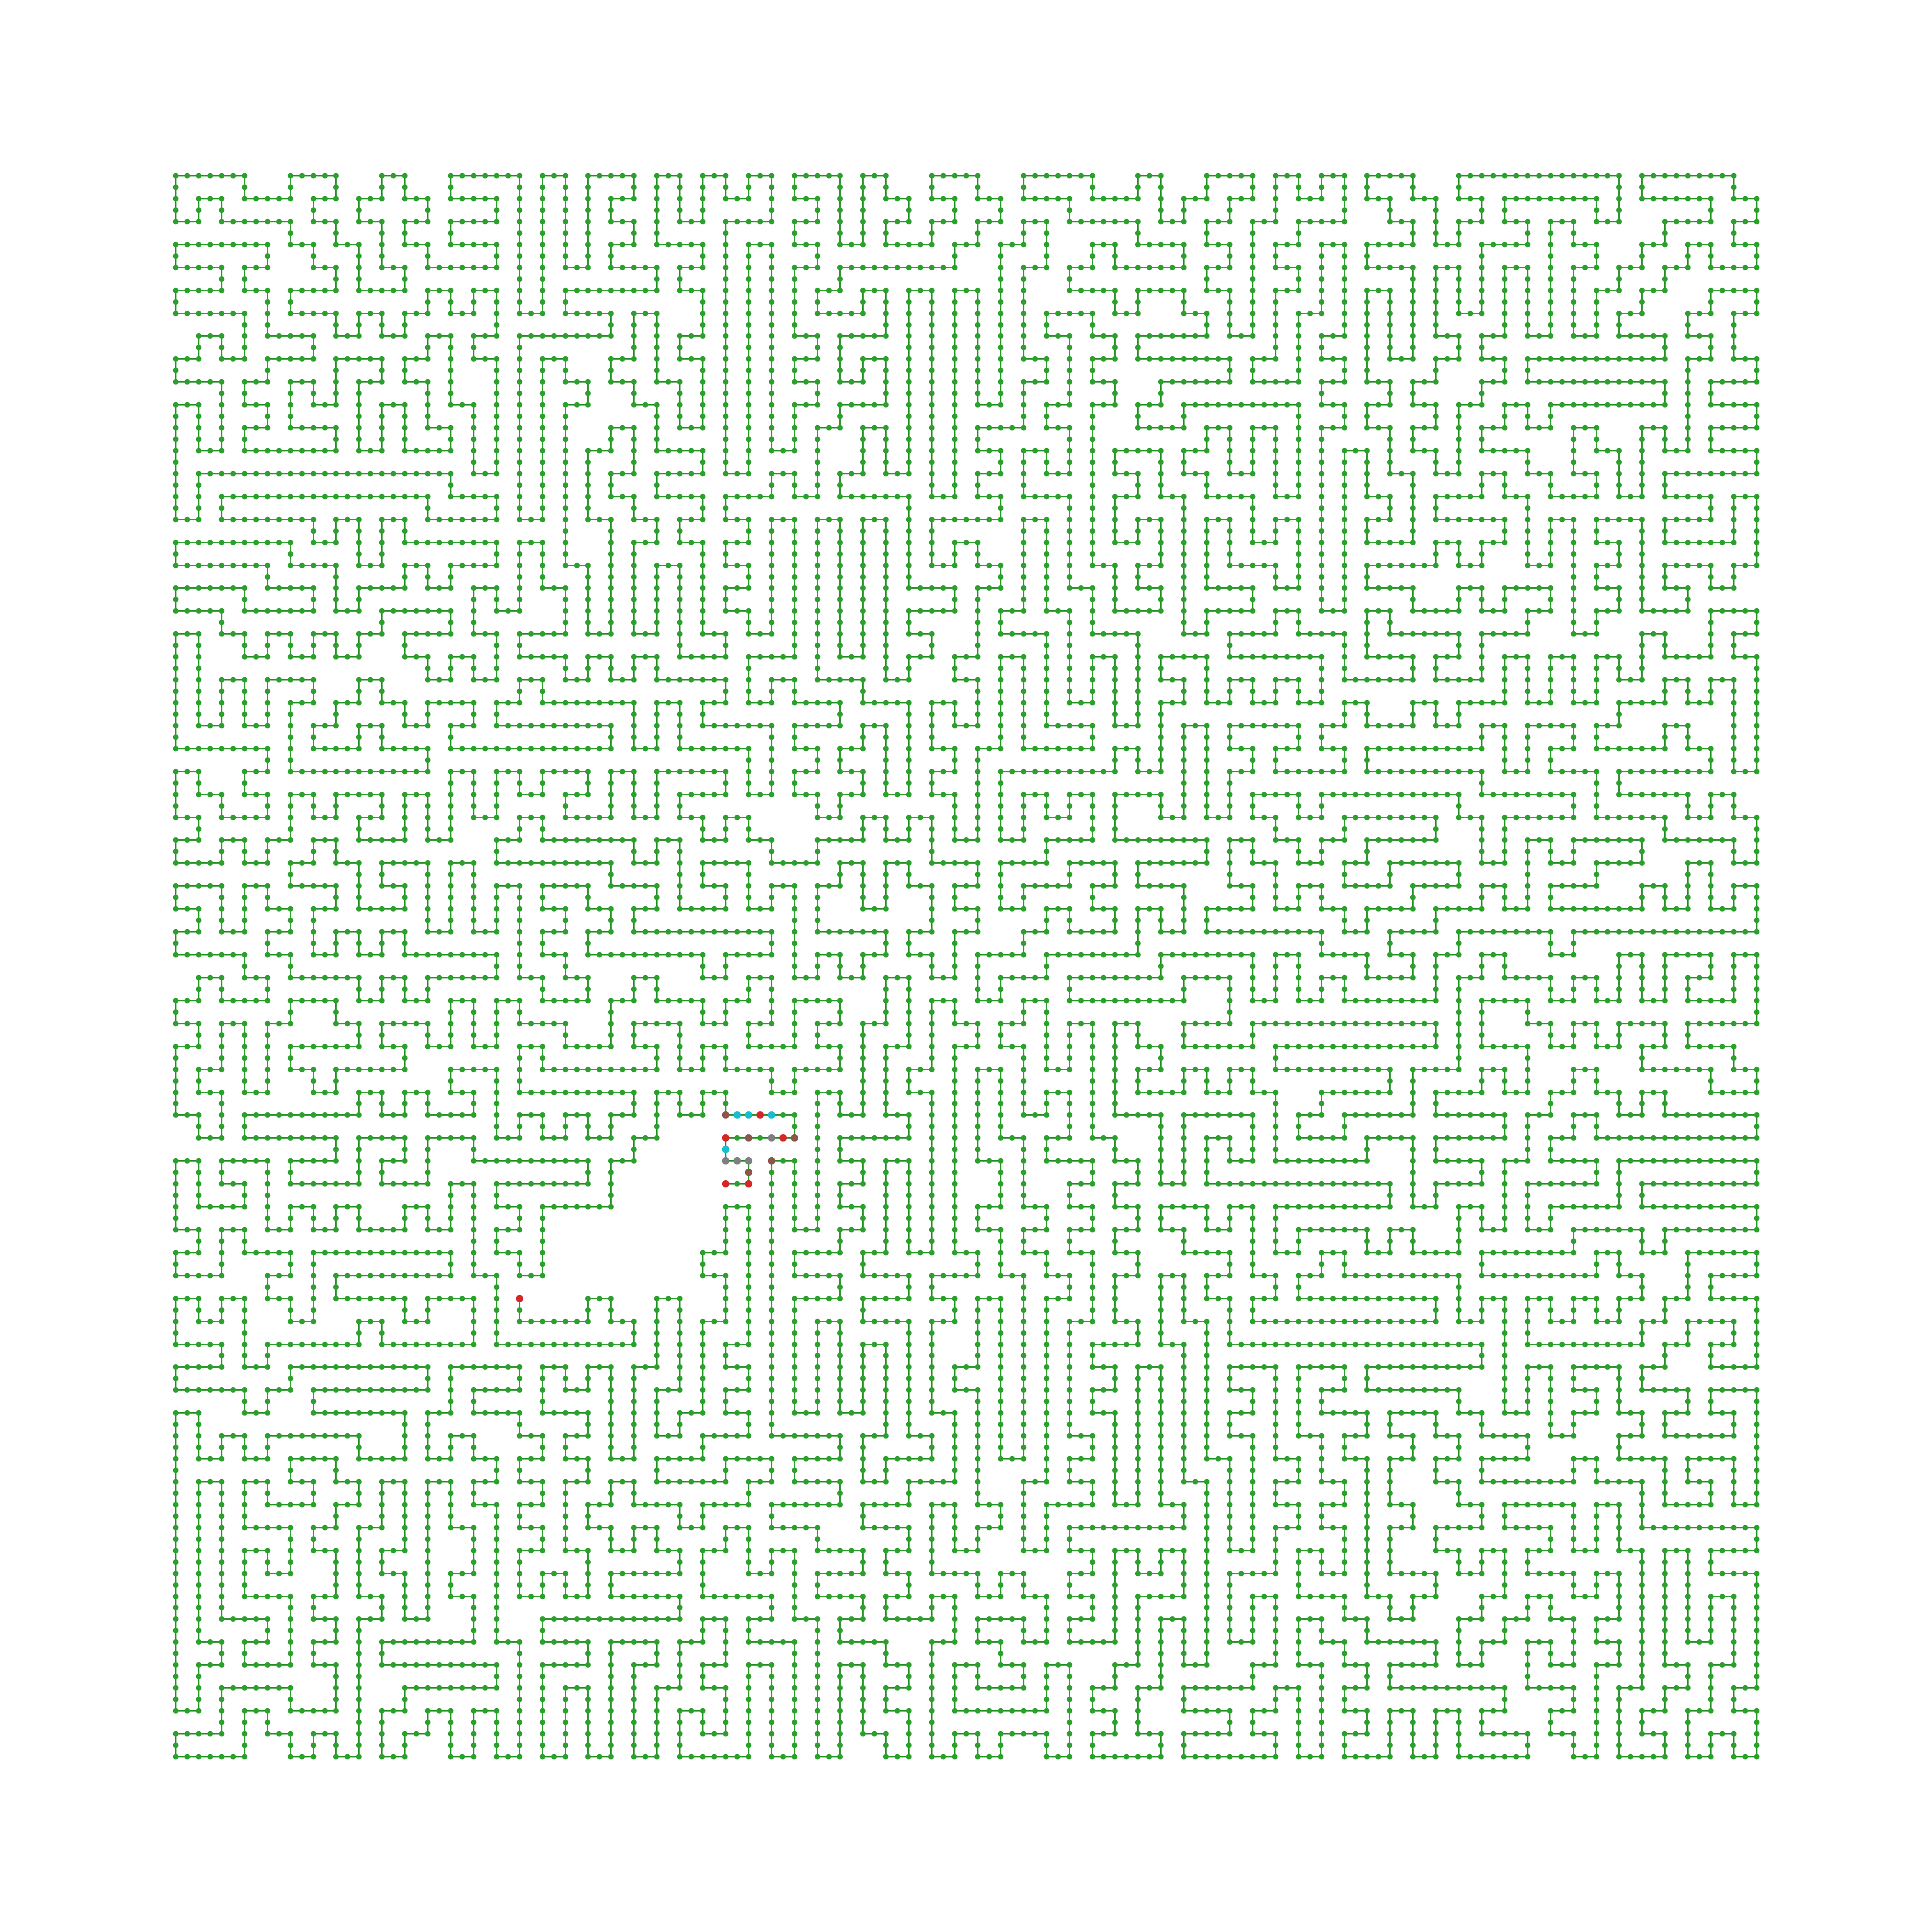

In [ ]:
# Let's test it with different distances
def test_manhattan_cheats(local_input: str, test_idx: int, mh_min: int, mh_max: int):
    G, start, end = parse_input(local_input)
    path = find_shortest_path(G, start, end)
    pos = path[test_idx]
    
    cheats = find_possible_cheat_ends(G, pos, mh_min, mh_max)
    print(f"From position {pos}, found {len(cheats)} possible ends")
    print(f"First few ends: {cheats}")
    
    # Visualize
    draw_cheat_ends(G, path, pos, mh_min, mh_max)

# Test with sample input
test_manhattan_cheats(full_input, 10, 2, 4)

**AI Prompt**

update `calculate_cheat_savings` to replace hadcoded cheat length of 2

**AI Response**

I'll modify `calculate_cheat_savings` to use the actual Manhattan distance between points as the cheat length:

```python
def calculate_cheat_savings(path: Path, cheat_start_idx: int, cheat_end: Node) -> tuple[int, int, int, int]:
    """
    Returns (distance_to_start, shortcut_length, distance_to_end, time_saved)
    Using path indices for efficient distance calculation
    """
    base_length = len(path) - 1
    cheat_start = path[cheat_start_idx]
    
    # Calculate actual Manhattan distance for the cheat
    dx = abs(cheat_end[0] - cheat_start[0])
    dy = abs(cheat_end[1] - cheat_start[1])
    shortcut_length = dx + dy
    
    # Find where in the path our cheat end would connect
    try:
        cheat_end_idx = path.index(cheat_end)
    except ValueError:
        return None  # This end point isn't on our path
    
    # Calculate components
    dist_to_start = cheat_start_idx
    dist_to_end = base_length - cheat_end_idx
    
    # Calculate total new path length and time saved
    new_length = dist_to_start + shortcut_length + dist_to_end
    time_saved = base_length - new_length
    
    return (dist_to_start, shortcut_length, dist_to_end, time_saved)

# Let's test it with a specific position
def test_savings(local_input: str, test_idx: int, mh_min: int, mh_max: int):
    G, start, end = parse_input(local_input)
    path = find_shortest_path(G, start, end)
    pos = path[test_idx]
    
    print(f"Testing cheats from position {pos} (index {test_idx}):")
    for end in find_possible_cheat_ends(G, pos, mh_min, mh_max):
        result = calculate_cheat_savings(path, test_idx, end)
        if result:
            dist_to_start, shortcut, dist_to_end, saved = result
            print(f"Cheat to {end}: length={shortcut}, saved={saved}")

# Test with sample input
test_savings(test_input, 10, 2, 4)
```

Would you like to run this and see how the savings change with different cheat lengths?

In [ ]:
print("Testing sample input:")
analyze_cheats(test_input, 1, 20, 50)

Testing sample input:
Found cheats that save:
There are 32 cheats that save 50 picoseconds.
There are 31 cheats that save 52 picoseconds.
There are 29 cheats that save 54 picoseconds.
There are 39 cheats that save 56 picoseconds.
There are 25 cheats that save 58 picoseconds.
There are 23 cheats that save 60 picoseconds.
There are 20 cheats that save 62 picoseconds.
There are 19 cheats that save 64 picoseconds.
There are 12 cheats that save 66 picoseconds.
There are 14 cheats that save 68 picoseconds.
There are 12 cheats that save 70 picoseconds.
There are 22 cheats that save 72 picoseconds.
There are 4 cheats that save 74 picoseconds.
There are 3 cheats that save 76 picoseconds.


In [ ]:
#analyze_cheats(full_input, 1, 20, 100)

**AI Prompt**

Its too slow. what is the time complexity of calculate_cheat_savings ?

**AI Response**

Ah, I see the performance issue. The bottleneck is in `calculate_cheat_savings`, specifically this line:
```python
cheat_end_idx = path.index(cheat_end)
```

Time complexity breakdown:
- `path.index()` is O(n) since it has to search through the entire path list
- We're calling this for many possible end points
- For each position in the path (n) we check many possible ends within Manhattan distance 20

We can optimize this by pre-calculating a mapping of positions to their path indices:

```python
def calculate_cheat_savings(path: Path, cheat_start_idx: int, cheat_end: Node, pos_to_idx: dict[Node, int]) -> tuple[int, int, int, int]:
    """
    Returns (distance_to_start, shortcut_length, distance_to_end, time_saved)
    Using pre-calculated position-to-index mapping for O(1) lookups
    """
    base_length = len(path) - 1
    cheat_start = path[cheat_start_idx]
    
    # Calculate actual Manhattan distance for the cheat
    dx = abs(cheat_end[0] - cheat_start[0])
    dy = abs(cheat_end[1] - cheat_start[1])
    shortcut_length = dx + dy
    
    # Find where in the path our cheat end would connect - O(1) lookup
    cheat_end_idx = pos_to_idx.get(cheat_end)
    if cheat_end_idx is None:
        return None
    
    dist_to_start = cheat_start_idx
    dist_to_end = base_length - cheat_end_idx
    
    new_length = dist_to_start + shortcut_length + dist_to_end
    time_saved = base_length - new_length
    
    return (dist_to_start, shortcut_length, dist_to_end, time_saved)
```

Would you like me to update the rest of the code to use this optimized version?

In [ ]:
def calculate_cheat_savings(path: Path, cheat_start_idx: int, cheat_end: Node, pos_to_idx: dict[Node, int]) -> tuple[int, int, int, int]:
    """
    Returns (distance_to_start, shortcut_length, distance_to_end, time_saved)
    Using pre-calculated position-to-index mapping for O(1) lookups
    """
    base_length = len(path) - 1
    cheat_start = path[cheat_start_idx]
    
    # Calculate actual Manhattan distance for the cheat
    dx = abs(cheat_end[0] - cheat_start[0])
    dy = abs(cheat_end[1] - cheat_start[1])
    shortcut_length = dx + dy
    
    # Find where in the path our cheat end would connect - O(1) lookup
    cheat_end_idx = pos_to_idx.get(cheat_end)
    if cheat_end_idx is None:
        return None
    
    dist_to_start = cheat_start_idx
    dist_to_end = base_length - cheat_end_idx
    
    new_length = dist_to_start + shortcut_length + dist_to_end
    time_saved = base_length - new_length
    
    return (dist_to_start, shortcut_length, dist_to_end, time_saved)

**AI Prompt**

Yes, update it

**AI Response**

I'll update the main functions to use the optimized version with position-to-index mapping:

```python
def find_all_cheats(G: nx.Graph, path: Path, mh_min: int, mh_max: int) -> list[list[tuple[Node, Node, int]]]:
    """
    Returns list where each item is a list of (start, end, saving) tuples for each position
    Only includes positive savings
    """
    # Pre-calculate position to index mapping
    pos_to_idx = {pos: idx for idx, pos in enumerate(path)}
    all_cheats = []
    
    for idx, pos in enumerate(path):
        position_cheats = []
        cheat_ends = find_possible_cheat_ends(G, pos, mh_min, mh_max)
        
        for end in cheat_ends:
            result = calculate_cheat_savings(path, idx, end, pos_to_idx)
            if result and result[3] > 0:  # if we have results and saved time is positive
                position_cheats.append((pos, end, result[3]))
        
        all_cheats.append(position_cheats)
    
    return all_cheats

def analyze_cheats(input_text: str, mh_min: int, mh_max: int, min_saving: int):
    G, start, end = parse_input(input_text)
    path = find_shortest_path(G, start, end)
    cheats = find_all_cheats(G, path, mh_min, mh_max)
    
    # Collect all savings and count them
    savings_count = {}
    for pos_cheats in cheats:
        for _, _, saving in pos_cheats:
            if saving >= min_saving:
                savings_count[saving] = savings_count.get(saving, 0) + 1
    
    # Print in format matching the puzzle example
    print("Found cheats that save:")
    for saving in sorted(savings_count.keys()):
        count = savings_count[saving]
        print(f"There are {count} cheats that save {saving} picoseconds.")

# Let's test with the full input
print("Testing full input:")
analyze_cheats(full_input, 1, 20, 100)
```

This should run much faster now since we've eliminated the O(n) lookups. Would you like to run it?

In [ ]:
def find_all_cheats(G: nx.Graph, path: Path, mh_min: int, mh_max: int) -> list[list[tuple[Node, Node, int]]]:
    """
    Returns list where each item is a list of (start, end, saving) tuples for each position
    Only includes positive savings
    """
    # Pre-calculate position to index mapping
    pos_to_idx = {pos: idx for idx, pos in enumerate(path)}
    all_cheats = []
    
    for idx, pos in enumerate(path):
        position_cheats = []
        cheat_ends = find_possible_cheat_ends(G, pos, mh_min, mh_max)
        
        for end in cheat_ends:
            result = calculate_cheat_savings(path, idx, end, pos_to_idx)
            if result and result[3] > 0:  # if we have results and saved time is positive
                position_cheats.append((pos, end, result[3]))
        
        all_cheats.append(position_cheats)
    
    return all_cheats

def analyze_cheats(input_text: str, mh_min: int, mh_max: int, min_saving: int):
    G, start, end = parse_input(input_text)
    path = find_shortest_path(G, start, end)
    cheats = find_all_cheats(G, path, mh_min, mh_max)
    
    # Collect all savings and count them
    savings_count = {}
    for pos_cheats in cheats:
        for _, _, saving in pos_cheats:
            if saving >= min_saving:
                savings_count[saving] = savings_count.get(saving, 0) + 1
    
    # Print in format matching the puzzle example
    print("Found cheats that save:")
    for saving in sorted(savings_count.keys()):
        count = savings_count[saving]
        print(f"There are {count} cheats that save {saving} picoseconds.")
        print(f"total {sum(savings_count.values())}")

# Let's test with the full input
print("Testing full input:")
analyze_cheats(test_input, 1, 20, 50)

Testing full input:
Found cheats that save:
There are 32 cheats that save 50 picoseconds.
total 285
There are 31 cheats that save 52 picoseconds.
total 285
There are 29 cheats that save 54 picoseconds.
total 285
There are 39 cheats that save 56 picoseconds.
total 285
There are 25 cheats that save 58 picoseconds.
total 285
There are 23 cheats that save 60 picoseconds.
total 285
There are 20 cheats that save 62 picoseconds.
total 285
There are 19 cheats that save 64 picoseconds.
total 285
There are 12 cheats that save 66 picoseconds.
total 285
There are 14 cheats that save 68 picoseconds.
total 285
There are 12 cheats that save 70 picoseconds.
total 285
There are 22 cheats that save 72 picoseconds.
total 285
There are 4 cheats that save 74 picoseconds.
total 285
There are 3 cheats that save 76 picoseconds.
total 285


In [ ]:
analyze_cheats(full_input, 1, 20, 100)

Found cheats that save:
There are 9799 cheats that save 100 picoseconds.
total 1021490
There are 5147 cheats that save 102 picoseconds.
total 1021490
There are 8160 cheats that save 104 picoseconds.
total 1021490
There are 4992 cheats that save 106 picoseconds.
total 1021490
There are 8629 cheats that save 108 picoseconds.
total 1021490
There are 5000 cheats that save 110 picoseconds.
total 1021490
There are 8184 cheats that save 112 picoseconds.
total 1021490
There are 5022 cheats that save 114 picoseconds.
total 1021490
There are 8574 cheats that save 116 picoseconds.
total 1021490
There are 5051 cheats that save 118 picoseconds.
total 1021490
There are 9232 cheats that save 120 picoseconds.
total 1021490
There are 4947 cheats that save 122 picoseconds.
total 1021490
There are 8270 cheats that save 124 picoseconds.
total 1021490
There are 4862 cheats that save 126 picoseconds.
total 1021490
There are 8763 cheats that save 128 picoseconds.
total 1021490
There are 4683 cheats that save